# Importing Libraries

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

sns.set(rc={'figure.figsize' : (12, 10)})

import warnings
warnings.filterwarnings("ignore")

# Loading Datasets

In [4]:
data = pd.read_csv('titanic_data.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Numerical Value Analysis

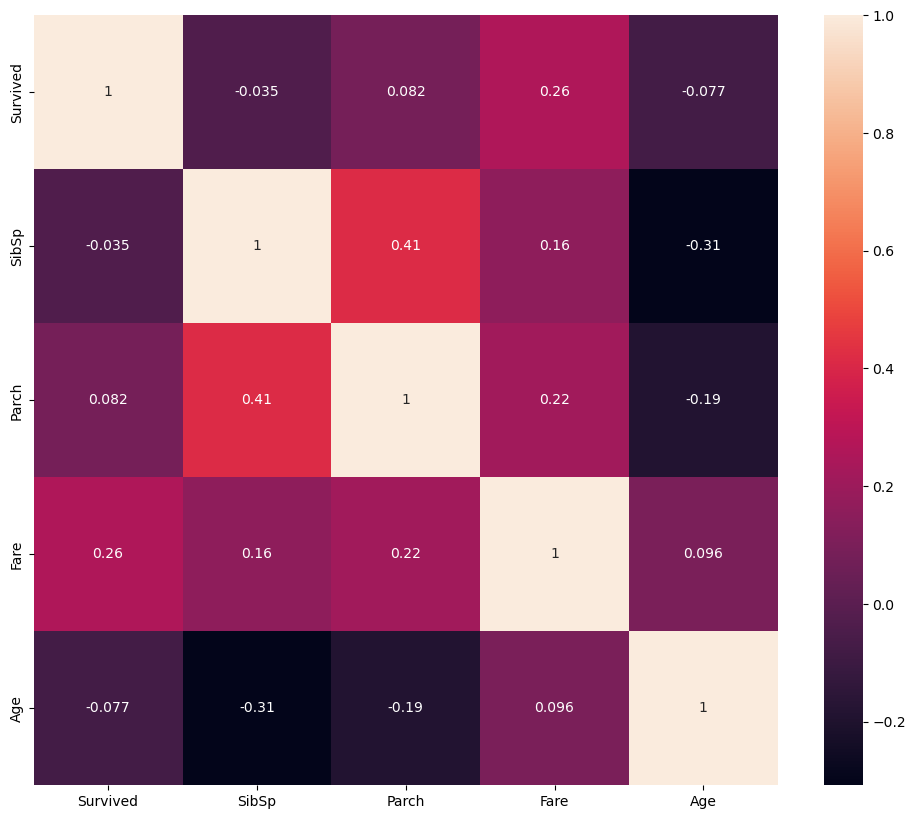

In [11]:
plt.figure(figsize = (12, 10)) 
heatmap = sns.heatmap(data[["Survived", "SibSp", "Parch", "Fare", "Age"]].corr(), annot = True)

# <font color = "green">sibsp-Number of siblings/ spouses aboard the Titanic</font>

In [12]:
data['SibSp'].nunique()

7

In [13]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

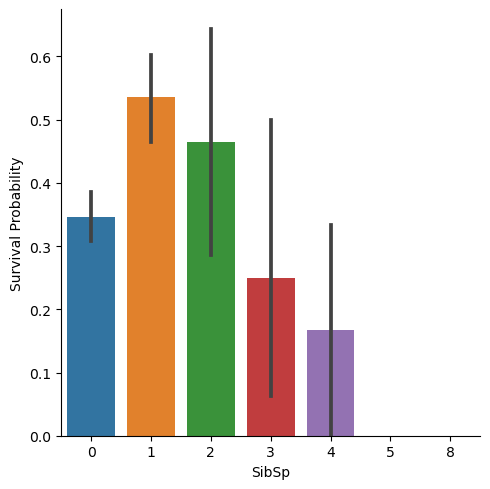

In [26]:
sns.catplot(x="SibSp", y="Survived", data = data, kind = "bar",).set_ylabels("Survival Probability")

# Age 

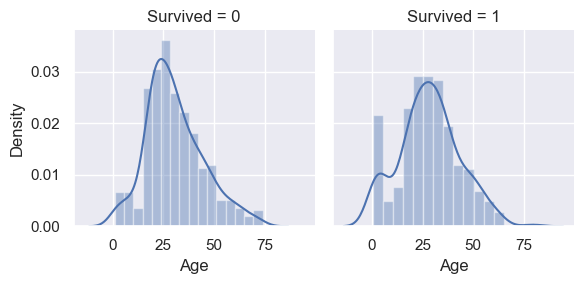

In [35]:
age_visual = sns.FacetGrid(data, col = "Survived")
age_visual = age_visual.map(sns.distplot, "Age")

# <font color="Green">Sex</font>

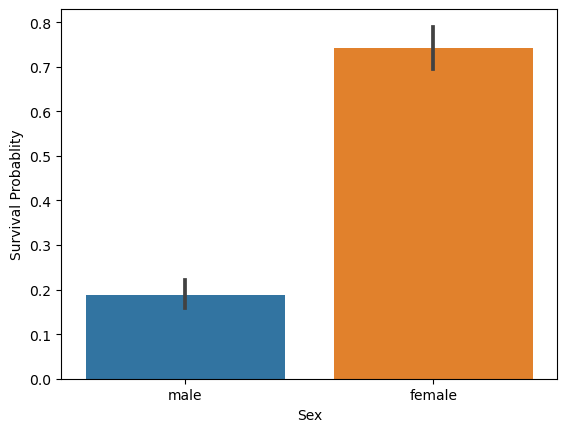

In [30]:
age_plot = sns.barplot(x = "Sex", y="Survived", data= data).set_ylabel("Survival Probablity")

In [31]:
data[['Sex', 'Survived']].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


# PClass

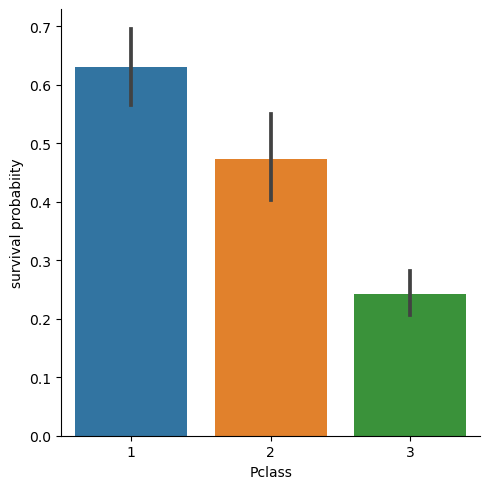

In [32]:
pclass = sns.catplot(x="Pclass", y="Survived", data = data, kind = "bar")
pclass = pclass.set_ylabels("survival probabiity")

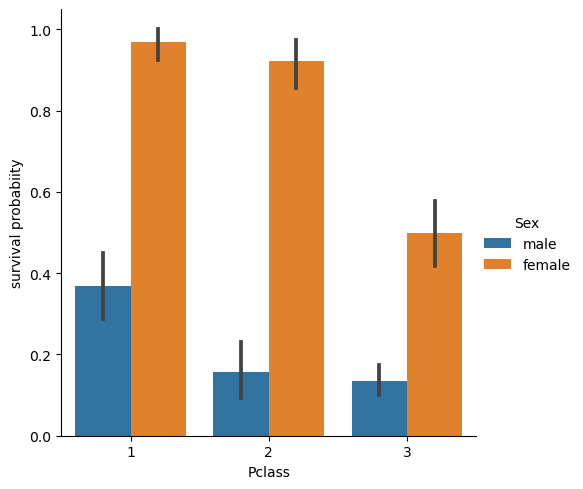

In [33]:
pclass = sns.catplot(x="Pclass", y="Survived", data = data, kind = "bar", hue="Sex")
pclass = pclass.set_ylabels("survival probabiity")

# <font color="green"> Embarked </font>

In [36]:
data["Embarked"] = data["Embarked"].fillna("S")

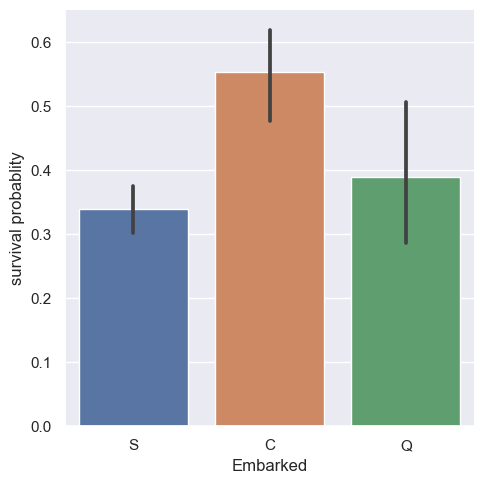

In [38]:
g = sns.catplot(x="Embarked", y="Survived", data=data, kind="bar")
g = g.set_ylabels("survival probablity")

# Explore Pclass vs Embarked

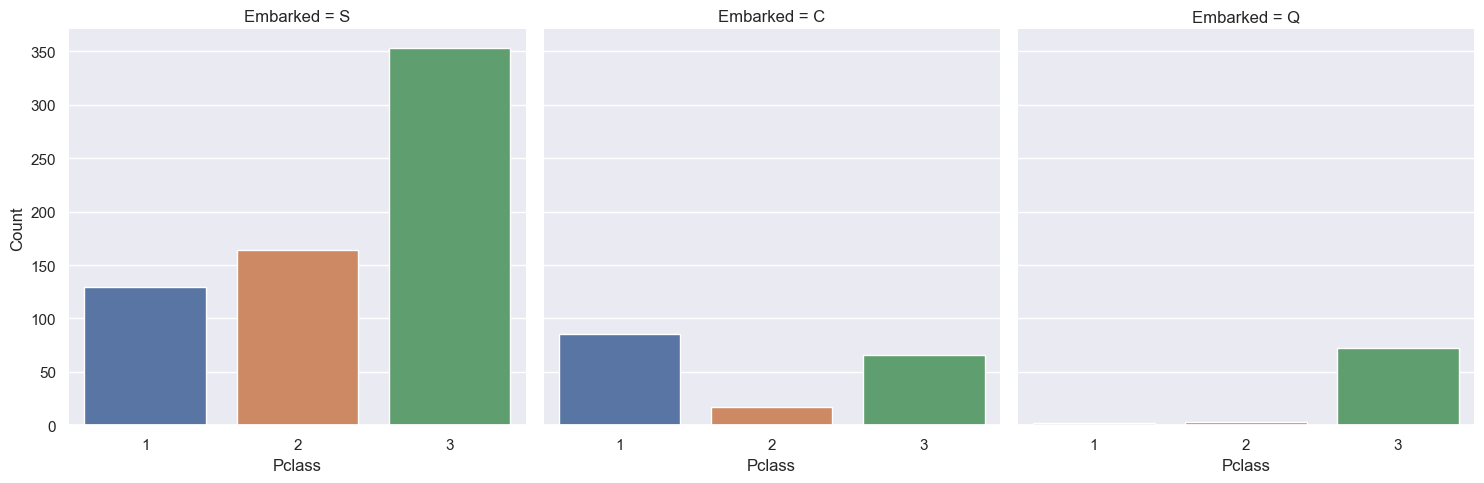

In [42]:
g = sns.catplot(x="Pclass", col="Embarked", data=data, kind="count")
g.despine(left=True)
g = g.set_ylabels("Count")

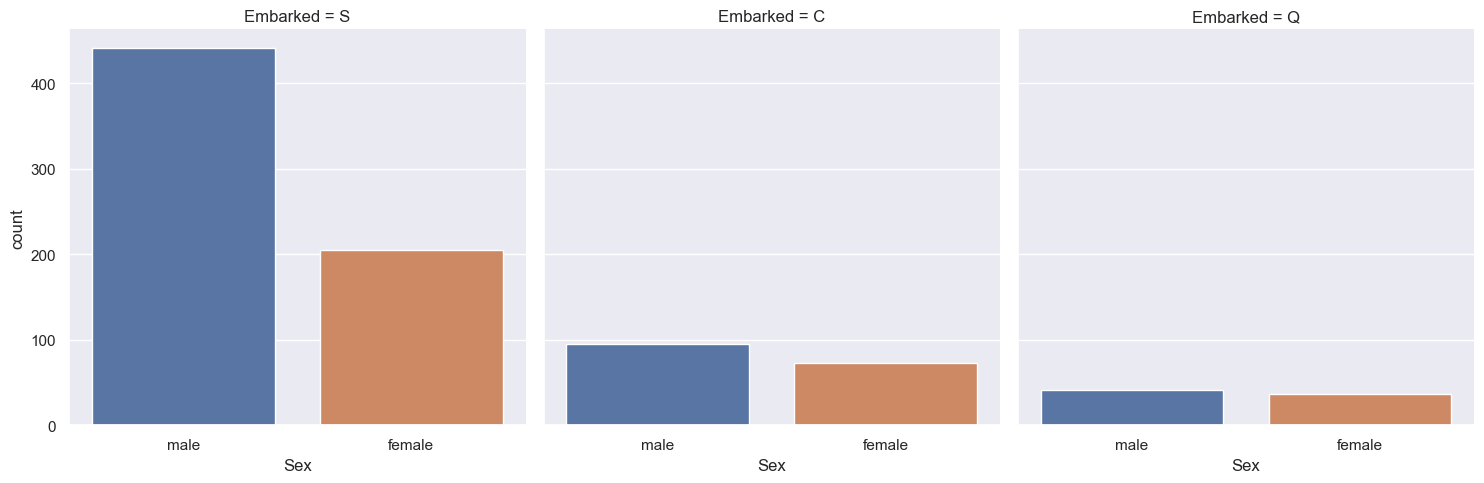

In [54]:
g = sns.catplot(x="Sex", col="Embarked", data = data, kind="count")

# Preparing Data

In [161]:
data = pd.read_csv('titanic_data.csv')

In [162]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [164]:
mean = data['Age'].mean()
std = data['Age'].std()

is_null = data['Age'].isnull().sum()

In [165]:
print(mean, std, is_null)

29.69911764705882 14.526497332334044 177


In [166]:
rand_age = np.random.randint(mean-std, mean+std, size = is_null)

In [167]:
type(rand_age)

numpy.ndarray

In [168]:
a = data['Age'].copy()
a[np.isnan(a)] = rand_age
data['Age'] = a

In [169]:
data['Age'].isnull().sum()

0

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [171]:
data["Embarked"] = data["Embarked"].fillna("S")

In [172]:
col_to_drop = ['PassengerId', 'Cabin', 'Ticket', 'Name']
data.drop(col_to_drop, axis=1, inplace = True)

In [173]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [180]:
genders = {"male" : 0, "female" : 1}
data['Sex'] = data['Sex'].map(genders)

In [181]:
ports = {"s":0, "C":1, "Q":2}
data['Embarked'] = data['Embarked'].map(ports)

In [182]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,NaN,22.0,1,0,7.2500,NaN
1,1,1,NaN,38.0,1,0,71.2833,1.0
2,1,3,NaN,26.0,0,0,7.9250,NaN
3,1,1,NaN,35.0,1,0,53.1000,NaN
4,0,3,NaN,35.0,0,0,8.0500,NaN


# Splitting The Data

In [183]:
x = data.drop(data.columns[[0]], axis=1)
y = data['Survived']

In [184]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 0)

# Scaling

In [185]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

# Classification

In [186]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators = 1000)

In [187]:
data.head()
mean_value = data['Fare'].mean()
data['Embarked'].fillna(value=mean_value, inplace=True)
data['Sex'].fillna(value=mean_value, inplace=True) 

In [188]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [189]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [190]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [191]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, logpred_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accurancy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accurancy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accurancy_score(ytest, rf_classifier_ypred)

NameError: name 'logpred_ypred' is not defined

In [192]:
print("Logistic Regression: ",round(logreg_acc*100,2))
print("Support Vector:      ",round(svc_classifier_acc*100,2))
print("Decision Tree:       ",round(dt_classifier_acc*100,2))
print("K-NN Classifier:     ",round(knn_classifier_acc*100,2))
print("Random Forest:       ",round(rf_classifier_acc*100,2))

NameError: name 'logreg_acc' is not defined